In [1]:
#changr directory
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('C:\\Users\\joaqu\\OneDrive\\Desktop\\IE - Academics\\T3 (Electives)\\Capstone Project')

In [3]:
msn02 = pd.read_csv('msn_02_fuel_leak_signals_preprocessed.csv', sep = ';')
msn10 = pd.read_csv('msn_10_fuel_leak_signals_preprocessed.csv', sep = ';')
msn11 = pd.read_csv('msn_11_fuel_leak_signals_preprocessed.csv', sep = ';')
msn12 = pd.read_csv('msn_12_fuel_leak_signals_preprocessed.csv', sep = ';')
msn29 = pd.read_csv('msn_29_fuel_leak_signals_preprocessed.csv', sep = ';')
msn37 = pd.read_csv('msn_37_fuel_leak_signals_preprocessed.csv', sep = ';')
msn53 = pd.read_csv('msn_53_fuel_leak_signals_preprocessed.csv', sep = ';')

In [4]:
msn02_leak5kg = msn02.copy()
msn02_leak1kg = msn02.copy()


We keep columns that haver the other aircrafts in mns02 since this will be the train dataset for the other flights

In [5]:
filtered_msn02= msn02.loc[:, ['UTC_TIME', 'Flight','FLIGHT_PHASE_COUNT','VALUE_FOB', 'FUEL_USED_1','FUEL_USED_2','FUEL_USED_3','FUEL_USED_4','FW_GEO_ALTITUDE']]
filtered_msn02_leak_5kg= msn02_leak5kg.loc[:, ['UTC_TIME', 'Flight','FLIGHT_PHASE_COUNT','VALUE_FOB', 'FUEL_USED_1','FUEL_USED_2','FUEL_USED_3','FUEL_USED_4','FW_GEO_ALTITUDE']]
filtered_msn02_leak_1kg= msn02_leak1kg.loc[:, ['UTC_TIME', 'Flight','FLIGHT_PHASE_COUNT','VALUE_FOB', 'FUEL_USED_1','FUEL_USED_2','FUEL_USED_3','FUEL_USED_4','FW_GEO_ALTITUDE']]

Feature Creation

In [6]:
filtered_msn02['UTC_TIME'] = pd.to_datetime(filtered_msn02['UTC_TIME'])

In [7]:
filtered_msn02 = filtered_msn02[filtered_msn02['FLIGHT_PHASE_COUNT'] == 8]
filtered_msn02['TOTAL_FUEL_USED'] = filtered_msn02['FUEL_USED_1'] + filtered_msn02['FUEL_USED_2'] + filtered_msn02['FUEL_USED_3'] + filtered_msn02['FUEL_USED_4']
filtered_msn02['FOB_dif'] = filtered_msn02['VALUE_FOB'] - filtered_msn02['VALUE_FOB'].shift(1)
filtered_msn02['FUSED_dif'] = filtered_msn02['TOTAL_FUEL_USED'] - filtered_msn02['TOTAL_FUEL_USED'].shift(1)
filtered_msn02.drop(['FUEL_USED_1', 'FUEL_USED_2', 'FUEL_USED_3', 'FUEL_USED_4'], axis=1, inplace=True)
filtered_msn02.head(5)

,UTC_TIME,Flight,FLIGHT_PHASE_COUNT,VALUE_FOB,FW_GEO_ALTITUDE,TOTAL_FUEL_USED,FOB_dif,FUSED_dif
2298,2011-03-09 12:44:19,V0136,8.0,26046.0,1847.500,908.3574,NaN,NaN
2299,2011-03-09 12:44:20,V0136,8.0,26042.0,1866.875,910.3853,-4.0,2.0279
2300,2011-03-09 12:44:21,V0136,8.0,26038.0,1886.375,912.5397,-4.0,2.1544
2301,2011-03-09 12:44:22,V0136,8.0,26032.0,1906.000,914.5687,-6.0,2.0290
2302,2011-03-09 12:44:23,V0136,8.0,26029.0,1925.750,916.7865,-3.0,2.2178


In [8]:
filtered_msn02['FOB_dif'] = filtered_msn02['FOB_dif'].fillna(0)
filtered_msn02['FUSED_dif'] = filtered_msn02['FUSED_dif'].fillna(0)

In [9]:
# Calculate TOTAL_SECONDS_PER_FLIGHT for each flight in the dataset
filtered_msn02['TOTAL_SECONDS_PER_FLIGHT'] = filtered_msn02.groupby('Flight')['UTC_TIME'].transform(lambda x: (x.max() - x.min()).total_seconds())


In [10]:
filtered_msn02['SECONDS_PER_FLIGHT'] = (filtered_msn02['UTC_TIME'] - filtered_msn02.groupby('Flight')['UTC_TIME'].transform('first')).dt.total_seconds()
filtered_msn02

,UTC_TIME,Flight,FLIGHT_PHASE_COUNT,VALUE_FOB,FW_GEO_ALTITUDE,TOTAL_FUEL_USED,FOB_dif,FUSED_dif,TOTAL_SECONDS_PER_FLIGHT,SECONDS_PER_FLIGHT
2298,2011-03-09 12:44:19,V0136,8.0,26046.0,1847.500,908.3574,0.0,0.0000,14048.0,0.0
2299,2011-03-09 12:44:20,V0136,8.0,26042.0,1866.875,910.3853,-4.0,2.0279,14048.0,1.0
2300,2011-03-09 12:44:21,V0136,8.0,26038.0,1886.375,912.5397,-4.0,2.1544,14048.0,2.0
2301,2011-03-09 12:44:22,V0136,8.0,26032.0,1906.000,914.5687,-6.0,2.0290,14048.0,3.0
2302,2011-03-09 12:44:23,V0136,8.0,26029.0,1925.750,916.7865,-3.0,2.2178,14048.0,4.0
...,...,...,...,...,...,...,...,...,...,...
622949,2011-03-10 17:16:57,V0137,8.0,7671.0,1037.000,20650.5410,-4.0,1.0140,16002.0,15998.0
622950,2011-03-10 17:16:58,V0137,8.0,7670.0,1026.625,20651.6730,-1.0,1.1320,16002.0,15999.0
622951,2011-03-10 17:16:59,V0137,8.0,7669.0,1016.375,20652.9000,-1.0,1.2270,16002.0,16000.0
622952,2011-03-10 17:17:00,V0137,8.0,7668.0,1006.750,20654.0580,-1.0,1.1580,16002.0,16001.0


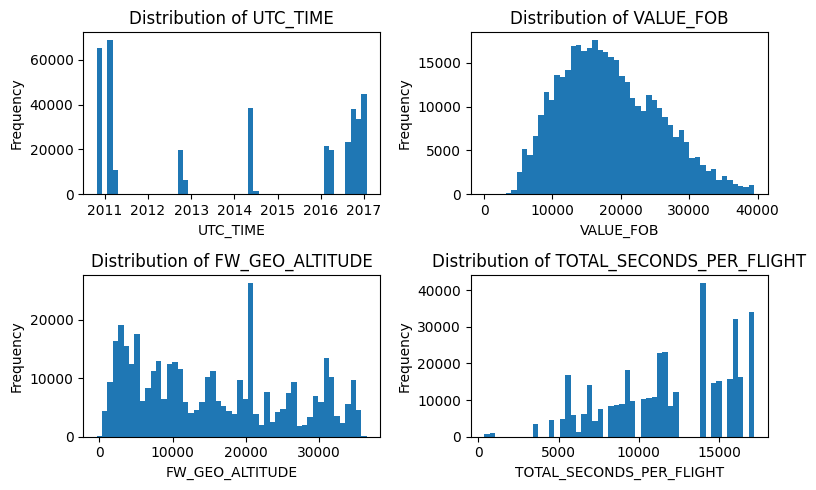

In [11]:

# Get the list of column names
columns = ['UTC_TIME','VALUE_FOB','FW_GEO_ALTITUDE','TOTAL_SECONDS_PER_FLIGHT']
# Calculate number of subplots needed
num_plots = len(columns)

# Calculate the number of rows and columns for subplots
num_cols = 2
num_rows = -(-num_plots // num_cols)  # Ceiling division to ensure enough rows

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(8, 5))

# Flatten axs if num_rows is 1
if num_rows == 1:
    axs = axs.reshape(1, -1)

# Iterate over each column and plot the histogram
for i, column in enumerate(columns):
    # Select the data for the current column
    data = filtered_msn02[column]
    
    # Plot histogram
    axs[i//num_cols, i%num_cols].hist(data, bins=50)
    
    # Set labels and title for each subplot
    axs[i//num_cols, i%num_cols].set_xlabel(column)
    axs[i//num_cols, i%num_cols].set_ylabel('Frequency')
    axs[i//num_cols, i%num_cols].set_title(f'Distribution of {column}')

# Remove empty subplots if num_plots is less than num_rows * num_cols
if num_plots < num_rows * num_cols:
    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axs.flatten()[i])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


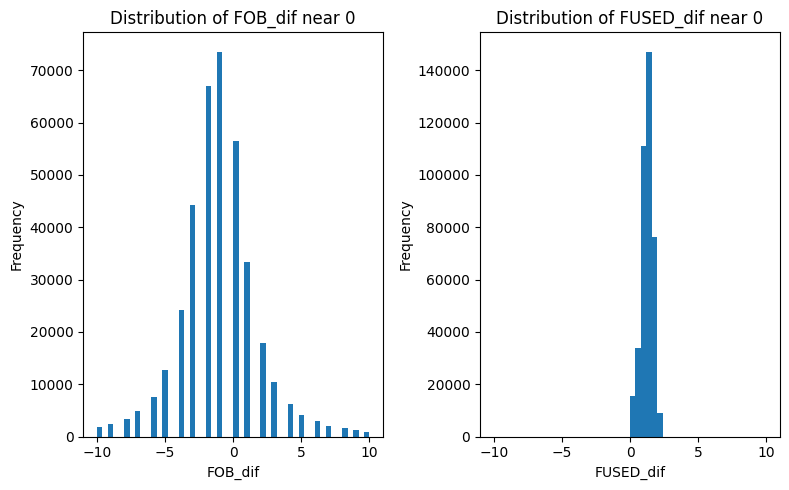

In [12]:
import matplotlib.pyplot as plt

# Assuming 'filtered_msn02' is your DataFrame and it's already defined

# Get the list of column names
columns = ['FOB_dif','FUSED_dif']

# Define the zoom range around 0
zoom_range = (-10, 10)  # for example, adjust this to your specific needs

# Create subplots
fig, axs = plt.subplots(1, len(columns), figsize=(8, 5))  # No need for dynamic calculation if it's always 2 histograms

# Iterate over each column and plot the histogram
for i, column in enumerate(columns):
    # Select the data for the current column
    data = filtered_msn02[column]
    
    # Plot histogram with limited x-axis range
    axs[i].hist(data, bins=50, range=zoom_range)
    
    # Set labels and title for each subplot
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Distribution of {column} near 0')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



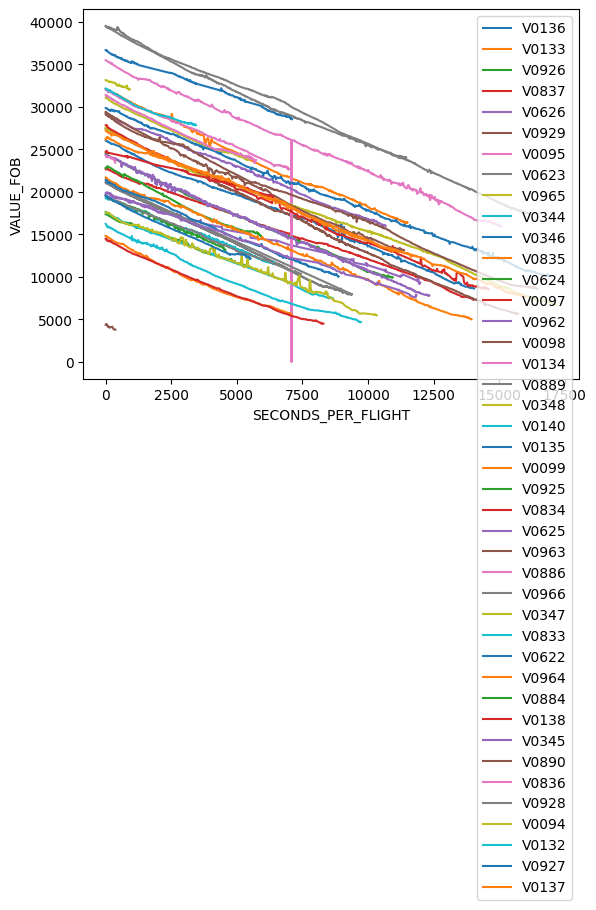

In [13]:


# Get unique flights
flights = filtered_msn02['Flight'].unique()

# Create a plot for each flight
for flight in flights:
    # Filter data for the current flight
    flight_data = filtered_msn02[filtered_msn02['Flight'] == flight]
    
    # Plot VALUE_FOB vs SECONDS_PER_FLIGHT
    plt.plot(flight_data['SECONDS_PER_FLIGHT'], flight_data['VALUE_FOB'], label=flight)
    
# Set labels and legend
plt.xlabel('SECONDS_PER_FLIGHT')
plt.ylabel('VALUE_FOB')
plt.legend()

# Show the plot
plt.show()

In [14]:
filtered_msn02 = filtered_msn02[filtered_msn02['VALUE_FOB'] != 0]

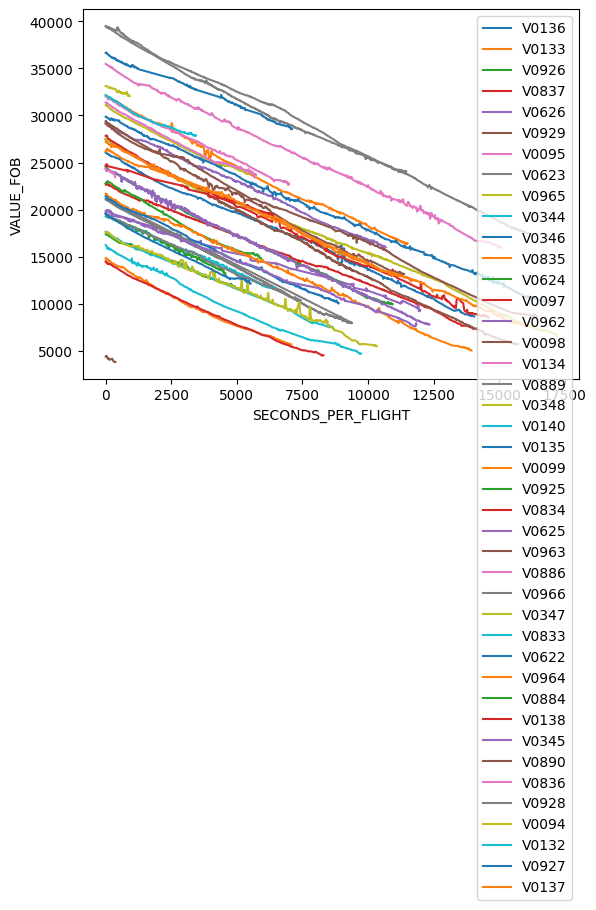

In [15]:
import matplotlib.pyplot as plt

# Get unique flights
flights = filtered_msn02['Flight'].unique()

# Create a plot for each flight
for flight in flights:
    # Filter data for the current flight
    flight_data = filtered_msn02[filtered_msn02['Flight'] == flight]
    
    # Plot VALUE_FOB vs SECONDS_PER_FLIGHT
    plt.plot(flight_data['SECONDS_PER_FLIGHT'], flight_data['VALUE_FOB'], label=flight)
    
# Set labels and legend
plt.xlabel('SECONDS_PER_FLIGHT')
plt.ylabel('VALUE_FOB')
plt.legend()

# Show the plot
plt.show()

In [16]:
# Filter flights with TOTAL_SECONDS_PER_FLIGHT less than the 25th percentile
filtered_msn02 = filtered_msn02[filtered_msn02['TOTAL_SECONDS_PER_FLIGHT'] >= 3600]

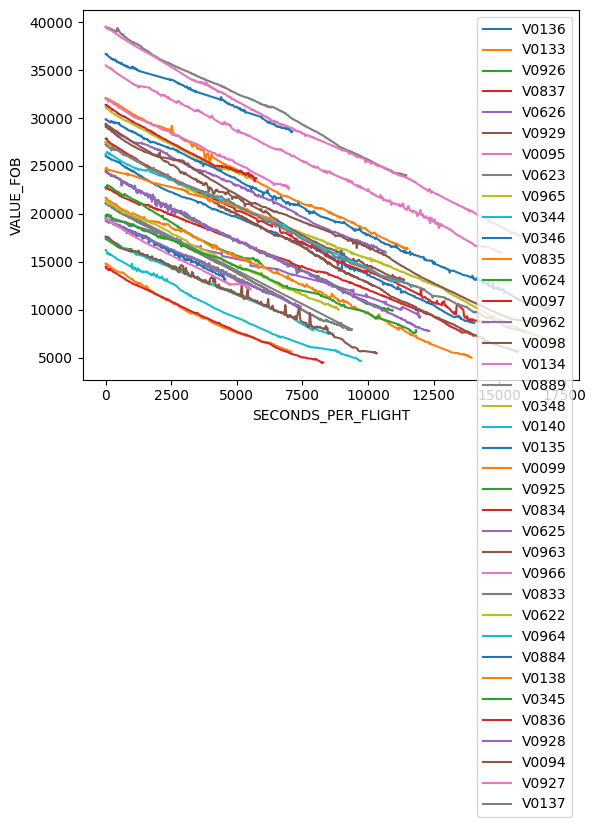

In [17]:


# Get unique flights
flights = filtered_msn02['Flight'].unique()

# Create a plot for each flight
for flight in flights:
    # Filter data for the current flight
    flight_data = filtered_msn02[filtered_msn02['Flight'] == flight]
    
    # Plot VALUE_FOB vs SECONDS_PER_FLIGHT
    plt.plot(flight_data['SECONDS_PER_FLIGHT'], flight_data['VALUE_FOB'], label=flight)
    
# Set labels and legend
plt.xlabel('SECONDS_PER_FLIGHT')
plt.ylabel('VALUE_FOB')
plt.legend()

# Show the plot
plt.show()

c:\Users\joaqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\joaqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:150: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\joaqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 245, in _count_physical_cores
    raise ValueError(


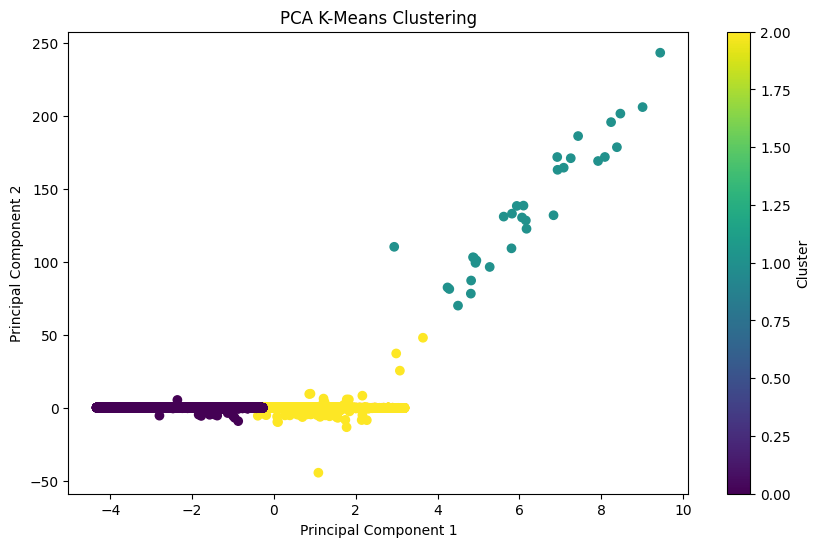

In [18]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


# Assuming 'filtered_msn02' is your dataframe after preprocessing

# Selecting numerical features for PCA
features = ['VALUE_FOB', 'FW_GEO_ALTITUDE', 'TOTAL_FUEL_USED', 'SECONDS_PER_FLIGHT', 'TOTAL_SECONDS_PER_FLIGHT', 'FOB_dif', 'FUSED_dif']
X = filtered_msn02[features]

# Standardizing the features
X_scaled = StandardScaler().fit_transform(X)

# Applying PCA to reduce dimensions
pca = PCA(n_components=2)  # Reducing to 2 dimensions for visualization and simplicity
X_pca = pca.fit_transform(X_scaled)

# Applying KMeans with a specified number of clusters (3 for demonstration)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_pca)

# Adding the cluster labels to our dataset
filtered_msn02['Cluster'] = kmeans.labels_

# Visualizing the clustering result on the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('PCA K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


c:\Users\joaqu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


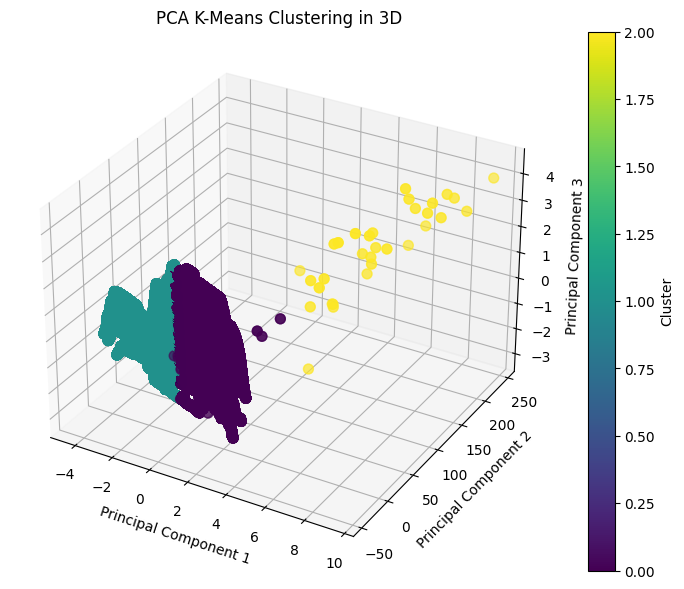

In [19]:
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting toolkit

# Adjusting PCA to reduce dimensions to 3 instead of 2
pca_3d = PCA(n_components=3)  # Reducing to 3 dimensions
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Applying KMeans with a specified number of clusters (3 for demonstration)
kmeans_3d = KMeans(n_clusters=3, random_state=42).fit(X_pca_3d)

# Adding the cluster labels to our dataset
filtered_msn02['Cluster_3D'] = kmeans_3d.labels_

# Visualizing the clustering result in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

# Scatter plot using the first three principal components
ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=kmeans_3d.labels_, cmap='viridis', s=50)

ax.set_title('PCA K-Means Clustering in 3D')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.colorbar(ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=kmeans_3d.labels_, cmap='viridis', s=50), label='Cluster')
plt.show()


# PCA K-Means Clustering Analysis Insights

The image you've uploaded appears to be a 3D scatter plot resulting from a PCA K-Means Clustering analysis. Here are some insights based on common interpretations of such plots:

## Clustering Distribution
There are distinct clusters visible in the 3D space defined by the first three principal components. Each cluster represents a group of data points that are similar to each other based on the features included in the PCA.

## Cluster Separation
The clusters seem to be well-separated along the Principal Component 2 axis, which suggests that this component captures a significant variance in the data that distinguishes between the clusters.

## Outliers
There appear to be some points that are distant from the main clusters, especially in the direction of Principal Component 2. These could be outliers or unusual observations that warrant further investigation.

## Principal Component Analysis
The axes of the graph represent the three principal components derived from the PCA. These components are linear combinations of the original features and capture the directions of maximum variance in the data. The spread of the points along these axes indicates how much variance each principal component explains.

## Cluster Sizes
The clusters vary in size. There's a large, dense cluster, and at least one smaller and less dense cluster. This could indicate differences in the prevalence of certain patterns within the dataset.

## Color Mapping
The color represents the cluster each point belongs to, as assigned by the K-means algorithm. The color gradient seems to show that the cluster assignment correlates with the position on the Principal Component 3 axis.

Based on these insights, you might consider the following steps for further analysis:

1. Investigate the characteristics of each cluster to understand the common patterns or anomalies they represent.
2. Examine any outliers or points that fall far from the centroids of the clusters to determine if they are significant or due to noise/data collection errors.
3. Consider the physical meaning of the principal components by examining the PCA loadings, which can give you an idea of which original features are most influential for each component.
4. Evaluate the explained variance ratio of each principal component to understand how much of the data's information is being captured in the reduced dimensions.

Remember, the true meaning and implications of the clusters can only be fully understood with domain knowledge and by considering the original features that contribute to the principal components.


In [20]:
filtered_msn02

,UTC_TIME,Flight,FLIGHT_PHASE_COUNT,VALUE_FOB,FW_GEO_ALTITUDE,TOTAL_FUEL_USED,FOB_dif,FUSED_dif,TOTAL_SECONDS_PER_FLIGHT,SECONDS_PER_FLIGHT,Cluster,Cluster_3D
2298,2011-03-09 12:44:19,V0136,8.0,26046.0,1847.500,908.3574,0.0,0.0000,14048.0,0.0,2,0
2299,2011-03-09 12:44:20,V0136,8.0,26042.0,1866.875,910.3853,-4.0,2.0279,14048.0,1.0,2,0
2300,2011-03-09 12:44:21,V0136,8.0,26038.0,1886.375,912.5397,-4.0,2.1544,14048.0,2.0,2,0
2301,2011-03-09 12:44:22,V0136,8.0,26032.0,1906.000,914.5687,-6.0,2.0290,14048.0,3.0,2,0
2302,2011-03-09 12:44:23,V0136,8.0,26029.0,1925.750,916.7865,-3.0,2.2178,14048.0,4.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
622949,2011-03-10 17:16:57,V0137,8.0,7671.0,1037.000,20650.5410,-4.0,1.0140,16002.0,15998.0,0,1
622950,2011-03-10 17:16:58,V0137,8.0,7670.0,1026.625,20651.6730,-1.0,1.1320,16002.0,15999.0,0,1
622951,2011-03-10 17:16:59,V0137,8.0,7669.0,1016.375,20652.9000,-1.0,1.2270,16002.0,16000.0,0,1
622952,2011-03-10 17:17:00,V0137,8.0,7668.0,1006.750,20654.0580,-1.0,1.1580,16002.0,16001.0,0,1


In [21]:
# Get centroids of the clusters
centroids = kmeans.cluster_centers_

# Inverse transform the centroids to get them back in the space of the original features
centroids_original_features = pca.inverse_transform(centroids)

# Create a dataframe of the centroids for easy interpretation
centroids_df = pd.DataFrame(centroids_original_features, columns=features)
centroids_df

,VALUE_FOB,FW_GEO_ALTITUDE,TOTAL_FUEL_USED,SECONDS_PER_FLIGHT,TOTAL_SECONDS_PER_FLIGHT,FOB_dif,FUSED_dif
0,-0.621289,-0.100311,0.995158,1.006472,0.554181,-0.005366,0.007645
1,2.344267,-3.233588,-1.557217,-1.443342,0.909943,97.182484,-97.182063
2,0.414354,0.067397,-0.664000,-0.671568,-0.370011,-0.009795,0.008274


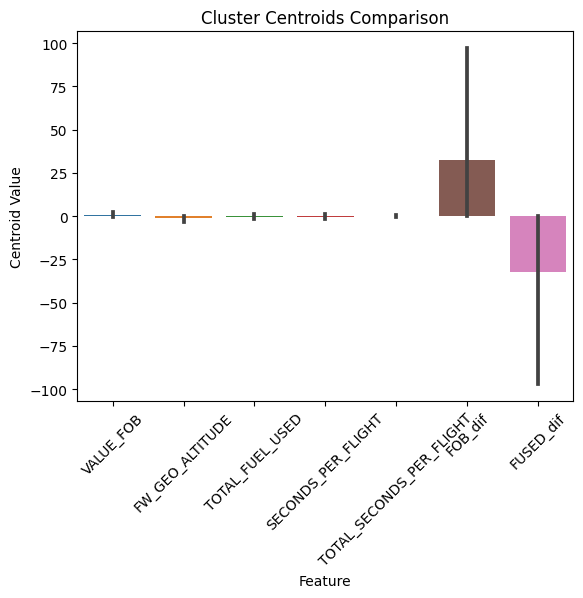

In [22]:


# Assuming 'centroids_df' is the dataframe created from the centroids with original features
sns.barplot(data=centroids_df)
plt.title('Cluster Centroids Comparison')
plt.xlabel('Feature')
plt.ylabel('Centroid Value')
plt.xticks(rotation=45)
plt.show()


# Insights from Cluster Centroids Bar Chart

Based on the bar chart you've provided, which shows a comparison of cluster centroids for different features, here are some insights:

## Feature Influence
The 'FUSED_dif' feature has the most considerable variation among the cluster centroids, as indicated by the length of its bar. This suggests that 'FUSED_dif' significantly influences the clustering, meaning that the difference in fuel used is likely a critical factor in differentiating between the clusters.

## Centroid Values
Most features have centroid values close to zero, which could indicate that after standardization, the clusters are not strongly differentiated by these features. However, 'FUSED_dif' stands out with a much larger range, showing that clusters have significant differences in this measure.

## Potential Outliers or Scale Issues
The large range and outliers in the 'FUSED_dif' could also indicate potential outliers in your data or that this feature has a different scale compared to the others. It might be useful to investigate the 'FUSED_dif' feature further for any data processing issues or to understand why it has such a high impact on the clustering.

## Comparatively Small Variation
Other features like 'VALUE_FOB', 'FW_GEO_ALTITUDE', 'TOTAL_FUEL_USED', 'SECONDS_PER_FLIGHT', and 'TOTAL_SECONDS_PER_FLIGHT' have bars clustered close to zero with little variation, indicating they may have less impact on the clustering or that the clusters are very similar with respect to these features.

## Data Distribution
The whiskers and outliers in the boxplot for 'FUSED_dif' suggest a wide distribution or variance within that feature across the clusters. This could mean that within some clusters, the fuel usage difference varies significantly from the cluster's median value.

## Consistency Across Clusters
The features with smaller bars and less variation imply that the values for these features are relatively consistent across the different clusters. This could suggest that these features do not vary significantly within the context of the clusters found by K-Means.

## Cluster Interpretation
To interpret the clusters, you would look at the feature values for the centroids. For instance, if one cluster has a high 'FUSED_dif' value, it might represent flights where there was a significant fuel usage difference, which could be indicative of a specific condition or event.

## Data Quality and Preprocessing
If 'FUSED_dif' was expected to have a significant impact, this graph confirms that expectation. If not, this might warrant a review of the data quality and preprocessing steps to ensure no errors have influenced the results.

In summary, the 'FUSED_dif' feature stands out as the primary differentiator among the clusters in your dataset, which suggests focusing further analysis on understanding the reasons behind this variance. Other features contribute less to the differences between clusters, indicating they may be of secondary importance or that the clusters are not defined by those dimensions in the data.


In [23]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
loadings = pca.components_
loadings_df = pd.DataFrame(loadings.T, columns=['PC1', 'PC2', 'PC3'], index=features)

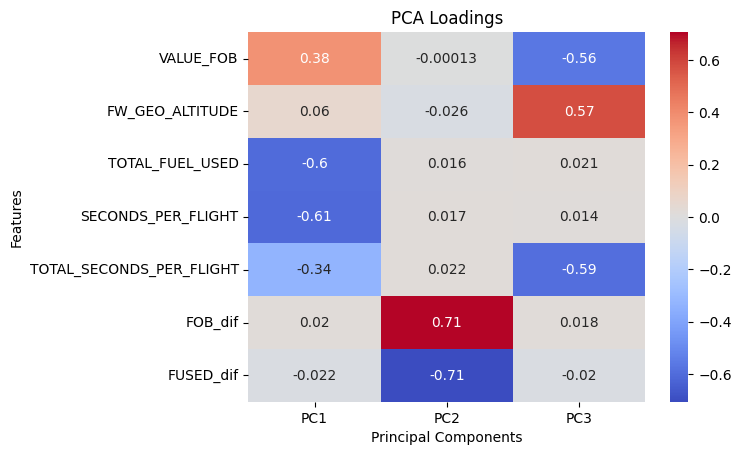

In [24]:
sns.heatmap(loadings_df, annot=True, cmap='coolwarm')
plt.title('PCA Loadings')
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.show()


# Insights from PCA Loadings Heatmap

The heatmap you've provided shows the PCA loadings for each feature across the first three principal components (PC1, PC2, and PC3). Here are some insights from this visualization:

## Influence on Components

- **FUSED_dif** has the strongest negative loading on PC2, suggesting it has a strong inverse relationship with this component.
- **FOB_dif** has a strong positive loading on PC2, which means it is positively correlated with this component.
- **VALUE_FOB** and **FW_GEO_ALTITUDE** have their most substantial loadings on PC3, suggesting they are important for this component.

## Dominant Features

- PC1 is most strongly influenced by **TOTAL_FUEL_USED** and **SECONDS_PER_FLIGHT**, both of which have significant negative loadings.
- PC2 is dominated by **FOB_dif** and **FUSED_dif**, but in opposite directions.
- PC3 has strong loadings from **VALUE_FOB** and **FW_GEO_ALTITUDE**, again in opposite directions.

## Interpretation of Components

- PC1 could be interpreted as capturing variations related to the overall fuel usage and flight duration, given the loadings of **TOTAL_FUEL_USED** and **SECONDS_PER_FLIGHT**.
- PC2 seems to represent a contrast between the difference in fuel onboard and the difference in fuel used, which might capture specific operational or fuel efficiency aspects.
- PC3 might be capturing aspects related to the value of fuel onboard and the altitude, potentially reflecting operational phases of flight where fuel consumption and altitude vary together.

## Potential Redundancy or Correlation

- Since **TOTAL_FUEL_USED** and **SECONDS_PER_FLIGHT** both have similar loadings on PC1, they might carry redundant information or be correlated with each other.

## Relative Importance

- The color intensity indicates the strength of the relationship between each feature and the principal component. Darker colors indicate stronger relationships (either positive or negative).

## Component Contribution to Variance

- These loadings do not tell us how much variance each principal component explains; for that, you would need to look at the explained variance ratio.

In summary, this heatmap gives you an understanding of how each original feature contributes to the principal components. It helps to interpret the dimensions of the PCA-reduced space in terms of the original features and can guide you in understanding the underlying patterns in your data that PCA has uncovered.


# Conclusion from PCA and K-means Analysis

The three visualizations you provided offer a multi-faceted view of your PCA and K-means clustering analysis. Here’s what we can conclude from each of the graphs and their combination:

## Cluster Centroids Comparison:

- 'FUSED_dif' significantly differentiates the clusters, with some clusters having a much higher or lower median value for this feature. This suggests that the difference in fuel used is a key factor in distinguishing the clusters.

## PCA Loadings:

- The first principal component (PC1) is heavily influenced by 'TOTAL_FUEL_USED' and 'SECONDS_PER_FLIGHT', which might capture overall fuel usage efficiency or flight duration characteristics.
- The second component (PC2) contrasts 'FOB_dif' with 'FUSED_dif', indicating it captures the difference between the change in fuel onboard and the change in fuel used.
- The third component (PC3) seems to relate to the 'VALUE_FOB' and 'FW_GEO_ALTITUDE', potentially reflecting operational stages of the flight where these values change together.

## 3D PCA Clustering Graph (not discussed in detail but referenced):

- Clusters are well-separated along at least one of the principal component axes, which suggests that the PCA has successfully reduced dimensionality in a way that clusters can be distinguished from each other.

## Combining these insights, we can conclude:

- The clustering is primarily driven by differences in fuel usage patterns, as indicated by 'FUSED_dif', which plays a significant role in both cluster centroid differences and the PCA loadings. This might reflect operational issues, fuel leakages, or other fuel-related events.
- The PCA has identified underlying patterns in the dataset that are not immediately apparent from the original features. The loadings show which features are most influential in these patterns, and the 3D scatter plot of the clusters shows that these patterns do capture meaningful differences in the data.
- The first two principal components seem to capture most of the variance and cluster-defining characteristics, which is common in PCA where the first few components capture the majority of the variance.
- 'VALUE_FOB' and 'FW_GEO_ALTITUDE' seem to be secondary factors influencing the clustering, mainly contributing to the third principal component.

In summary, your analysis seems to be effectively identifying distinct patterns within the flight data related to fuel usage. Further investigation into these patterns could yield insights into operational behaviors, efficiencies, or anomalies such as leakages. It would be important to consider the domain knowledge and context of the data when interpreting these clusters to make informed decisions or take action based on these findings.


In [25]:
descriptive_stats_per_cluster = filtered_msn02.groupby('Cluster_3D')[['VALUE_FOB', 'TOTAL_FUEL_USED','TOTAL_SECONDS_PER_FLIGHT', 'FW_GEO_ALTITUDE','FOB_dif','FUSED_dif']].mean().round(2)

descriptive_stats_per_cluster

,VALUE_FOB,TOTAL_FUEL_USED,TOTAL_SECONDS_PER_FLIGHT,FW_GEO_ALTITUDE,FOB_dif,FUSED_dif
Cluster_3D,,,,,,
0,20950.61,5106.47,10706.65,16645.33,-1.59,1.19
1,14093.84,13791.18,14012.20,13695.82,-1.23,1.22
2,26476.97,908.70,11126.84,2051.30,16282.34,-12134.70


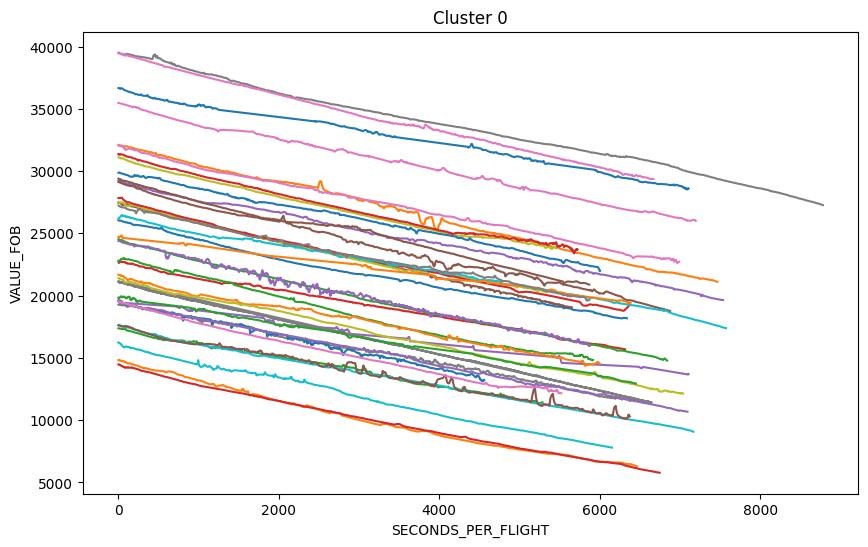

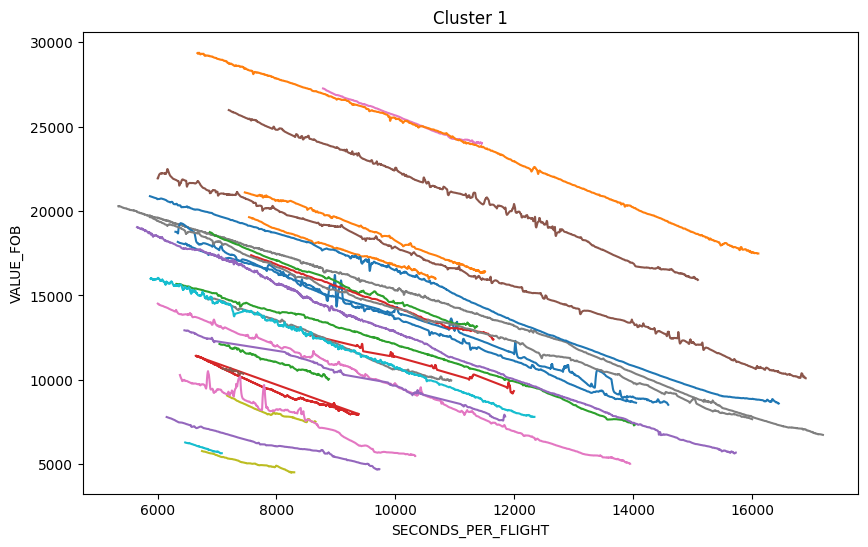

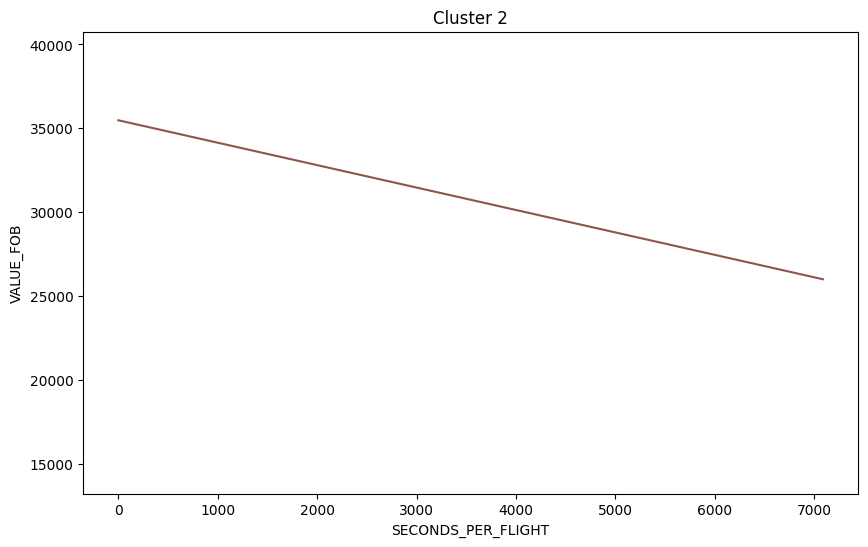

In [37]:
# Get unique clusters
clusters = filtered_msn02['Cluster_3D'].unique()

# Iterate over each cluster
for cluster in clusters:
    plt.figure(figsize=(10, 6))  # Start a new figure for each cluster with a specified size
    cluster_data = filtered_msn02[filtered_msn02['Cluster_3D'] == cluster]
    
    # Get unique flights within this cluster
    flights_in_cluster = cluster_data['Flight'].unique()
    
    # Plot VALUE_FOB vs SECONDS_PER_FLIGHT for each flight within the cluster
    for flight in flights_in_cluster:
        flight_data = cluster_data[cluster_data['Flight'] == flight]
        plt.plot(flight_data['SECONDS_PER_FLIGHT'], flight_data['VALUE_FOB'], label=flight)
    
    # Set labels and title
    plt.xlabel('SECONDS_PER_FLIGHT')
    plt.ylabel('VALUE_FOB')
    plt.title(f'Cluster {cluster}')
    
    # Do not include legend
    plt.show()



In [27]:
filtered_msn02['Cluster_3D'].value_counts()

Cluster_3D
0    234454
1    153209
2        32
Name: count, dtype: int64

In [28]:
cluster2 = filtered_msn02[filtered_msn02['Cluster_3D'] == 2]
cluster2.shape

(32, 12)

In [29]:
cluster1 = filtered_msn02[filtered_msn02['Cluster_3D'] == 1]
cluster1.shape

(153209, 12)

In [30]:
cluster0 = filtered_msn02[filtered_msn02['Cluster_3D'] == 0]
cluster0.shape

(234454, 12)

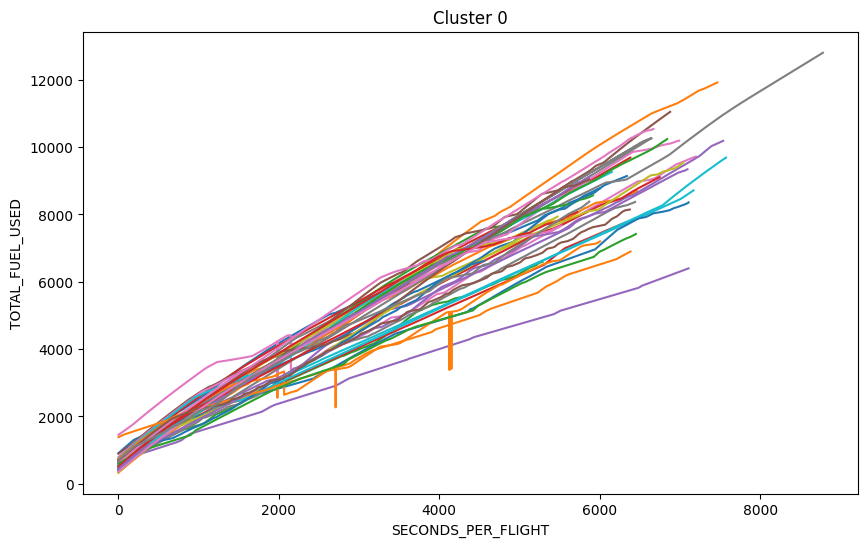

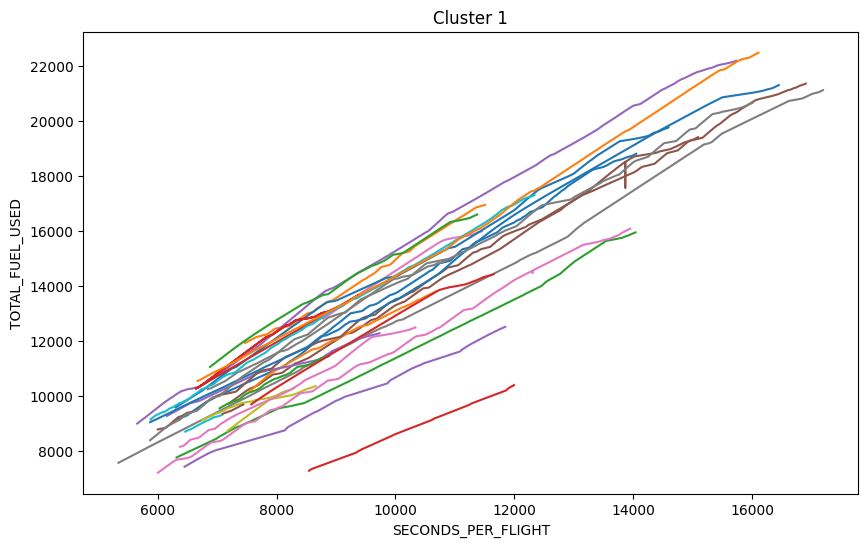

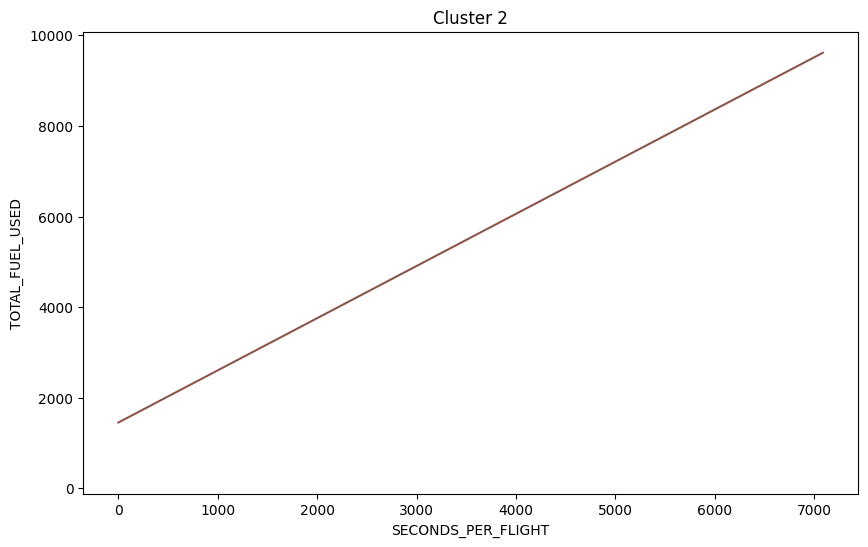

In [38]:
import matplotlib.pyplot as plt

# Get unique clusters
clusters = filtered_msn02['Cluster_3D'].unique()

# Iterate over each cluster
for cluster in clusters:
    plt.figure(figsize=(10, 6))  # Start a new figure for each cluster with a specified size
    cluster_data = filtered_msn02[filtered_msn02['Cluster_3D'] == cluster]
    
    # Get unique flights within this cluster
    flights_in_cluster = cluster_data['Flight'].unique()
    
    # Plot TOTAL_FUEL_USED vs SECONDS_PER_FLIGHT for each flight within the cluster
    for flight in flights_in_cluster:
        flight_data = cluster_data[cluster_data['Flight'] == flight]
        plt.plot(flight_data['SECONDS_PER_FLIGHT'], flight_data['TOTAL_FUEL_USED'], label=flight)
    
    # Set labels and title
    plt.xlabel('SECONDS_PER_FLIGHT')
    plt.ylabel('TOTAL_FUEL_USED')
    plt.title(f'Cluster {cluster}')
    
    # Do not include legend
    plt.show()


In [32]:
cluster0.isna().sum()

UTC_TIME                    0
Flight                      0
FLIGHT_PHASE_COUNT          0
VALUE_FOB                   0
FW_GEO_ALTITUDE             0
TOTAL_FUEL_USED             0
FOB_dif                     0
FUSED_dif                   0
TOTAL_SECONDS_PER_FLIGHT    0
SECONDS_PER_FLIGHT          0
Cluster                     0
Cluster_3D                  0
dtype: int64

In [33]:
msn02_final = cluster0

In [34]:
import pandas as pd

# Assuming msn02_final is your DataFrame
# Drop the 'Cluster' and 'Cluster_3D' columns
msn02_final = msn02_final.drop(columns=['Cluster', 'Cluster_3D'])

In [35]:
data1 = {}

data1['Features'] = list(msn02_final .columns)
data1['msn02'] = list(msn02_final .isnull().sum())
data1['msn02_%'] = [round(x/msn02_final .shape[0]*100,2) for x in list(msn02_final .isnull().sum())]
data1['n_unique'] = list(msn02_final .nunique())

pd.DataFrame(data1)

,Features,msn02,msn02_%,n_unique
0,UTC_TIME,0,0.0,227811
1,Flight,0,0.0,38
2,FLIGHT_PHASE_COUNT,0,0.0,1
3,VALUE_FOB,0,0.0,31671
4,FW_GEO_ALTITUDE,0,0.0,186428
5,TOTAL_FUEL_USED,0,0.0,226769
6,FOB_dif,0,0.0,185
7,FUSED_dif,0,0.0,47367
8,TOTAL_SECONDS_PER_FLIGHT,0,0.0,38
9,SECONDS_PER_FLIGHT,0,0.0,8783


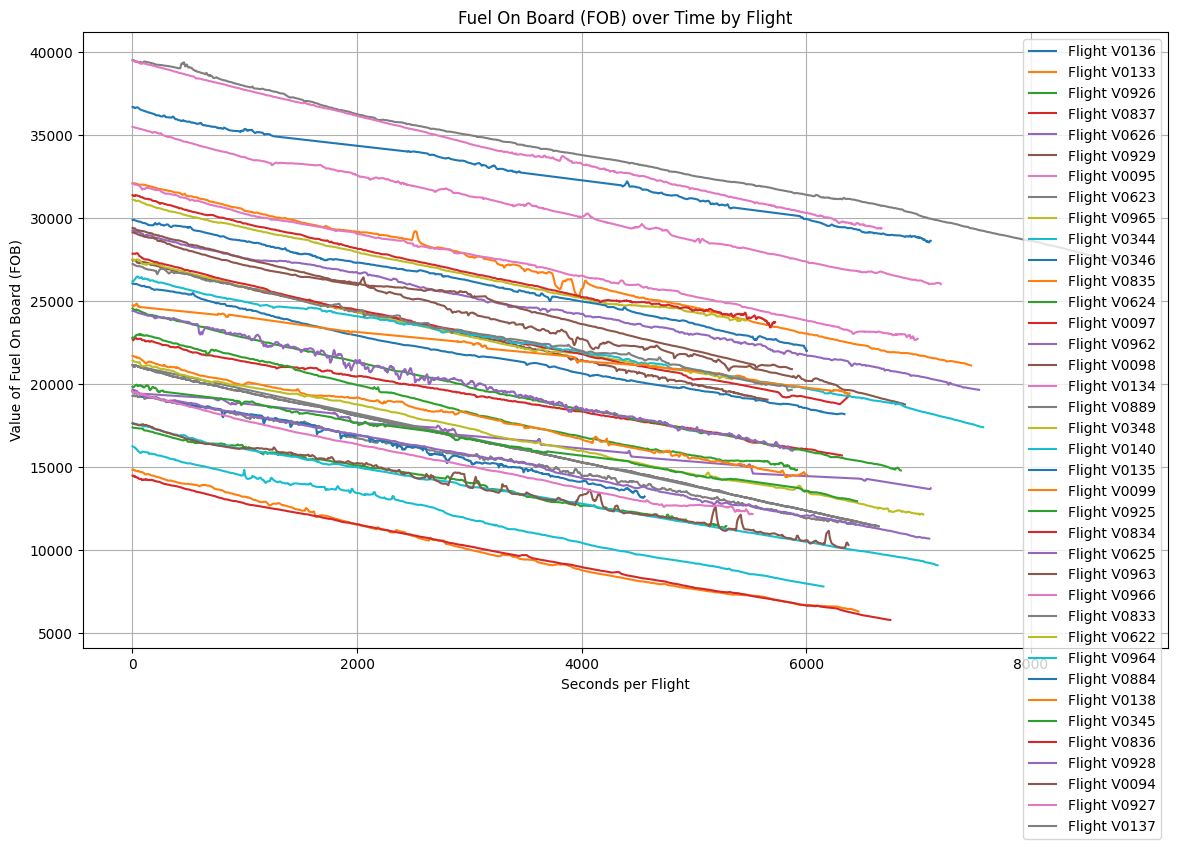

In [36]:
# Plotting one line per Flight
plt.figure(figsize=(14, 8))

for flight in msn02_final['Flight'].unique():
    flight_data = msn02_final[msn02_final['Flight'] == flight]
    plt.plot(flight_data['SECONDS_PER_FLIGHT'], flight_data['VALUE_FOB'], label=f'Flight {flight}')

plt.xlabel('Seconds per Flight')
plt.ylabel('Value of Fuel On Board (FOB)')
plt.title('Fuel On Board (FOB) over Time by Flight')
plt.legend()
plt.grid(True)
plt.show()
